<P> <img src="https://i.ibb.co/gyNf19D/nhslogo.png" alt="nhslogo" border="0" width="100" align="right"><font size="6"><b> CS5131</b> Introduction to Artificial Intelligence - Assignment 2</font>

# Utilising and Optimising Genetic Algorithms to Play Mastermind

I

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Task-1:-Mastermind" data-toc-modified-id="Task-1:-Mastermind-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Task 1: Mastermind</a></span></li><li><span><a href="#Task-2:-Genetic-Algorithm" data-toc-modified-id="Task-2:-Genetic-Algorithm-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Task 2: Genetic Algorithm</a></span></li><li><span><a href="#Task-3:-Optimization" data-toc-modified-id="Task-3:-Optimization-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Task 3: Optimization</a></span></li></ul></div>

<h2>Set-up and Imports<span class="tocSkip"></span></h2>

In [18]:
import re, random
import time
from collections import Counter
from functools import reduce, partial
from itertools import tee, zip_longest
import np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Task 1: Mastermind

In [250]:
while True:
    try:
        code_type = input("ELECTRONIC MASTERMIND 1977\nSELECT CODE TYPE: [3, 4, 5]: ").strip()
        if code_type.lower() == "stop":
            print("Terminated", end="\n\n\n")
            break
        N = int(code_type)
        if N not in [3, 4, 5]: raise ValueError()
    except ValueError:
        print("Not a valid code type.", end="\n\n\n")
    else:
        shield = np.random.choice(10, N)
        print(shield, "NOTE: THIS SHOULD BE HIDDEN. IT IS SHOWN FOR DEMO PURPOSES ONLY")
        i = 0
        output = np.array(["."]*N)
        while (output != "B").any():
            try:
                ui = np.array(re.split(r"\s", input("Enter the code separated by space: "))).astype(int)
                if len(ui) != N: raise ValueError("Insufficient Values in Input")
            except ValueError as e:
                print(e if len(str(e)) and not str(e).startswith("invalid literal for int()") else "Unexpected Format for Sequence\n")
            else:
                output = np.array(["."]*N)
                output[np.isin(ui, list(set(shield[ui != shield]) & set(ui[ui != shield])))] = "W"
                output[ui==shield] = "B"
                i += 1
                print("Guess", i, ":", np.sum(output=="B"), np.sum(output=="W"), output,  end="\n\n")

        print("SOLVED:", shield, end="\n\n\n")

ELECTRONIC MASTERMIND 1977
SELECT CODE TYPE: [3, 4, 5]: 5
[6 1 5 6 7] NOTE: THIS SHOULD BE HIDDEN. IT IS SHOWN FOR DEMO PURPOSES ONLY
Enter the code separated by space: 1 2 3 4 5
Guess 1 : 0 2 ['W' '.' '.' '.' 'W']

Enter the code separated by space: 6 7 8 9 0
Guess 2 : 1 1 ['B' 'W' '.' '.' '.']

Enter the code separated by space: 6 1 5 6 7
Guess 3 : 5 0 ['B' 'B' 'B' 'B' 'B']

SOLVED: [6 1 5 6 7]


ELECTRONIC MASTERMIND 1977
SELECT CODE TYPE: [3, 4, 5]: stop
Terminated




## Task 2: Genetic Algorithm

ELECTRONIC MASTERMIND 1977 Genetic Algorithm Solver
You have selected 4 pegs.
Population Size: 100	Number of Parents: 20	Max Generations: 50
Elitism: True	Elitism Rate: 0.3	Max Size of Ei: 10
Bit-Flip Rate: 0.03	Permuation Rate: 0.03	Scrambling Rate: 0.03	Inversion Rate: 0.03
Uniform Crossover Rate: 0.5	Single Point Crossover Rate: 0 0
Selection: K-Tournament Selection
Code is 4 4 8 5
Guess 1: 0 1 2 3
0 0 ['.', '.', '.', '.']
#GEN 1 : 1.115
Elapsed Time of Generation 0.014664888381958008
Guess 2: 7 7 5 4
Elapsed Time of Guess: 0.01870560646057129
(0, 2) ['W', '.', '.', 'W']
#GEN 1 : 1.21
Elapsed Time of Generation 0.014220952987670898
Guess 3: 6 4 4 7
Elapsed Time of Guess: 0.01835036277770996
(1, 1) ['W', 'B', '.', '.']
#GEN 1 : 1.2683333333333338
Elapsed Time of Generation 0.014418840408325195
#GEN 2 : 1.2016666666666673
Elapsed Time of Generation 0.017319679260253906
#GEN 3 : 1.1583333333333339
Elapsed Time of Generation 0.017248868942260742
#GEN 4 : 1.1716666666666673
Elapsed Time 

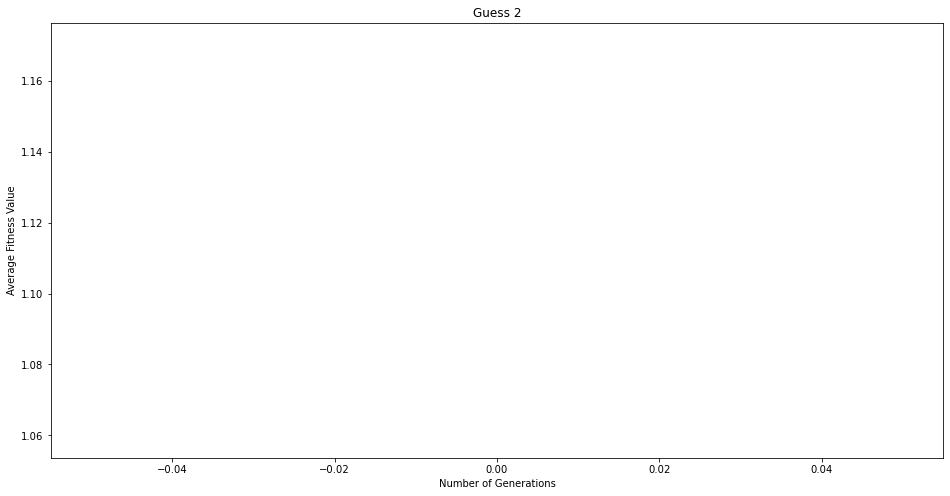

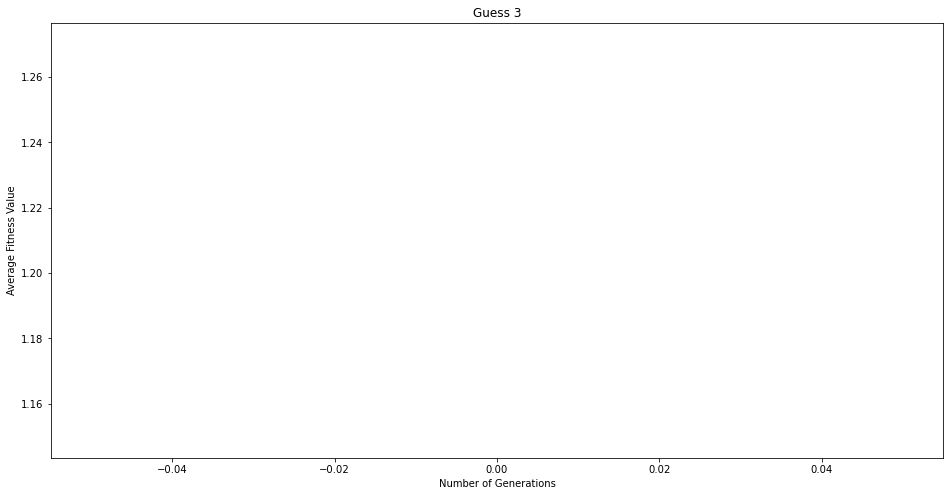

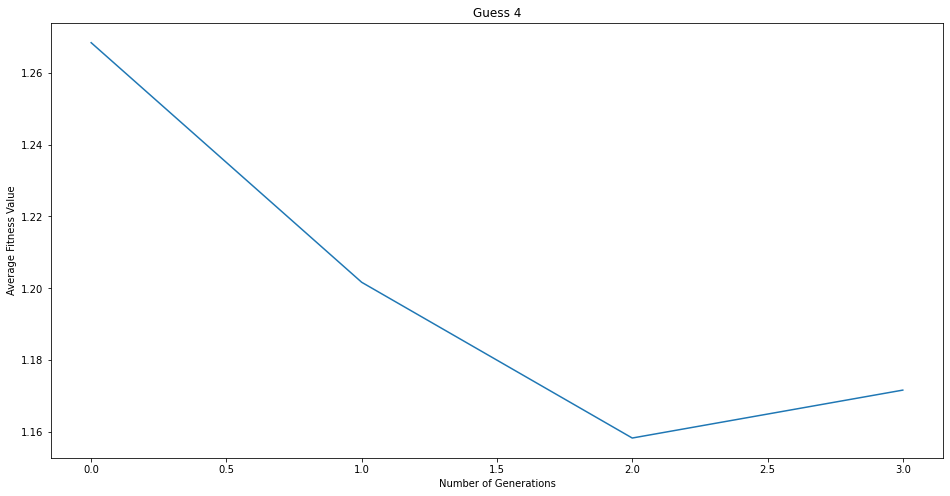

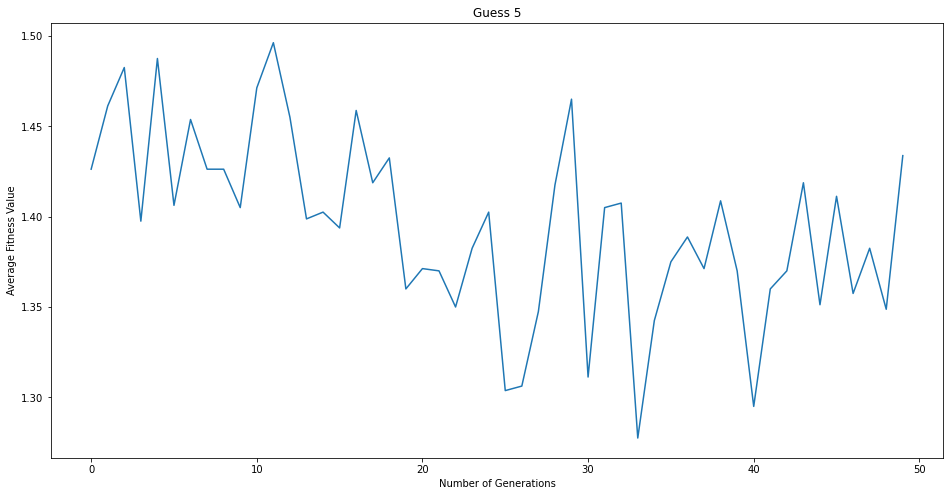

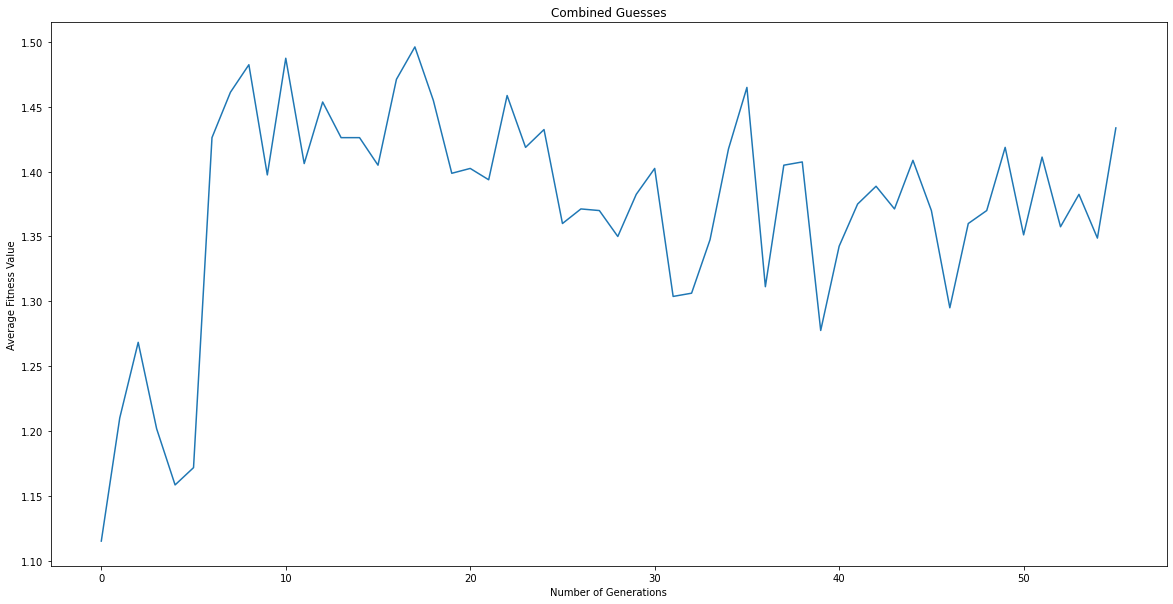

(5,
 1.1037421226501465,
 56,
 [[1.115],
  [1.21],
  [1.2683333333333338,
   1.2016666666666673,
   1.1583333333333339,
   1.1716666666666673],
  [1.42625,
   1.46125,
   1.4825,
   1.3975,
   1.4875,
   1.40625,
   1.45375,
   1.42625,
   1.42625,
   1.405,
   1.47125,
   1.49625,
   1.455,
   1.39875,
   1.4025,
   1.39375,
   1.45875,
   1.41875,
   1.4325,
   1.36,
   1.37125,
   1.37,
   1.35,
   1.3825,
   1.4025,
   1.30375,
   1.30625,
   1.3475,
   1.4175,
   1.465,
   1.31125,
   1.405,
   1.4075,
   1.2775,
   1.3425,
   1.375,
   1.38875,
   1.37125,
   1.40875,
   1.37,
   1.295,
   1.36,
   1.37,
   1.41875,
   1.35125,
   1.41125,
   1.3575,
   1.3825,
   1.34875,
   1.43375]])

In [274]:
import np, re, random, time
from collections import Counter
import matplotlib.pyplot as plt

def GA(
    SLOTS=3,
    N = 9,
    SELECTION = 0, # Tournament Selection
    UNIFORM_CROSSOVER_PROBABILITY = 0.5,
    SINGLESTART_CROSSOVER_PROBABILITY = 0,
    SINGLEEND_CROSSOVER_PROBABILITY = 0,
    DOUBLE_CROSSOVER_PROBABILITY = 1,
    BITFLIP_PROBABILITY = 0.03,
    PERMUTE_PROBABILITY = 0.03,
    SCRAMBLE_PROBABILITY = 0.03,
    INVERT_PROBABILITY = 0.03,
    NUM_PARENTS = 20,
    MAX_GENERATIONS = 50,
    POPSIZE = 100,
    ELITISM_RATE = 30,
    MAX_GUESS = 20,
    MAX_ELITES = 10,
    a = 1,
    b = 1,
    show_printout=True
):

    if show_printout: print("ELECTRONIC MASTERMIND 1977 Genetic Algorithm Solver")
    if show_printout: print("You have selected", SLOTS, "pegs.")
        
    if show_printout:
        print("Population Size:",POPSIZE, end="\t")
        print("Number of Parents:", n_parents, end="\t")
        print("Max Generations:", MAX_GENERATIONS)
        print("Elitism:", bool(ELITISM_RATE), end="\t")
        print("Elitism Rate:", ELITISM_RATE/POPSIZE, end="\t")
        print("Max Size of Ei:", MAX_ELITES)
        print("Bit-Flip Rate:", BITFLIP_PROBABILITY, end="\t")
        print("Permuation Rate:", PERMUTE_PROBABILITY, end="\t")
        print("Scrambling Rate:", SCRAMBLE_PROBABILITY, end="\t")
        print("Inversion Rate:", INVERT_PROBABILITY)
        print("Uniform Crossover Rate:", UNIFORM_CROSSOVER_PROBABILITY, end="\t")
        print("Single Point Crossover Rate:", SINGLESTART_CROSSOVER_PROBABILITY, SINGLEEND_CROSSOVER_PROBABILITY)
        print("Selection:","Roulette Wheel Selection" if SELECTION else "K-Tournament Selection")

    # Generates Probability Values in Array of size :param size:
    p = random.random

    # Generates Mastermind Values in Array of size :param size:
    def rand(*size): return np.random.randint(N+1, size=size if len(size) else 1)


    # Abstract Code Class
    class Code(list):
        def __init__(self, *args):
            if len(args) == 1: args = args[0]
            super().__init__(map(int, args))

        @classmethod
        def randomize(cls, slots=3):
            return cls(rand(slots))

        @classmethod
        def randomDistinct(cls, size=POPSIZE, slots=SLOTS, initial=[]):
            pop = set(map(cls, initial))
            while len(pop) < size:
                pop = pop & set(map(cls, rand(size-len(pop), slots)))
            return list(pop)

        def __repr__(self):
            return f"Code("+super().__repr__()[1:-1]+")"
        
        def __eq__(self, other):
            return hash(self) == hash(other)

        def stringify(self):
            return "".join(map(str, self))

        def __hash__(self):
            return hash(self.stringify())
        
        def mark(self, secret):
            output = ["." for i in range(SLOTS)]
            bcount = wcount = 0
            for i in range(len(self)):
                if self[i] == secret[i]:
                    output[i] = "B"
                    bcount += 1
            
            intersection = Counter([secret[i] for i in range(SLOTS) if output[i] != "B"]) & Counter([self[i] for i in range(SLOTS) if output[i] != "B"])

            for i in range(len(self)):
                if output[i] == "B": continue
                if self[i] in intersection and intersection[self[i]] > 0:
                    output[i] = "W"
                    wcount += 1
                    intersection[self[i]] -= 1

            return (bcount, wcount), output
        
        def fitness(self, guesses):
            sum = 0
            for (guess, guess_result) in guesses:
                B, W = guess.mark(self)[0]
                sum += a*abs(B - guess_result[0]) + b*abs(W - guess_result[1])
            return sum/len(guesses)


    class Chromosome(Code):
        def __init__(self, *args):
            super().__init__(*args)
            
        
        ## Crossover Methods
            
        def uniform_crossover(self, other, puniformcross=UNIFORM_CROSSOVER_PROBABILITY):
            return [self[i] if p() > puniformcross else other[i] for i in range(SLOTS)]
            
        def double_crossover(self, other, pdoublecross=DOUBLE_CROSSOVER_PROBABILITY):
            code = self.copy()
            if p() < pdoublecross:
                a, b = sorted(np.random.choice(SLOTS, size=2, replace=False))
                code[a:b] = other[a:b]
            return code
            
        def single_start_crossover(self, other, psinglestartcross=SINGLESTART_CROSSOVER_PROBABILITY):
            code = self.copy()
            if p() < psinglestartcross:
                pos = random.randint(0, SLOTS-1)
                self[pos:] = other[pos:]
            return code
            
        def single_end_crossover(self, other, psingleendcross=SINGLEEND_CROSSOVER_PROBABILITY):
            code = self.copy()
            if p() < psingleendcross:
                pos = random.randint(0, SLOTS-1)
                self[:pos] = other[:pos]
            return code
        
        def cross(self, other, puniformcross=UNIFORM_CROSSOVER_PROBABILITY, pdoublecross=DOUBLE_CROSSOVER_PROBABILITY, psinglestartcross=SINGLESTART_CROSSOVER_PROBABILITY, psingleendcross=SINGLEEND_CROSSOVER_PROBABILITY):
            uni = Chromosome.uniform_crossover(self, other, puniformcross)
            double = Chromosome.double_crossover(uni, other, pdoublecross)
            singlestart = Chromosome.single_start_crossover(double, other, psinglestartcross)
            singleend = Chromosome.single_end_crossover(singlestart, other, psingleendcross)
            return singleend
        
        ## Mutation Methods
        
        def bitflip(self, pbitflip=BITFLIP_PROBABILITY):
            code = self.copy()
            if p() < pbitflip:
                code[random.randint(0, SLOTS-1)] = rand()
            return code
        
        def invert(self, pinvert=INVERT_PROBABILITY):
            code = self.copy()
            if p() < pinvert:
                a, b = sorted(np.random.choice(SLOTS, size=2, replace=False))
                code =  code[:a]+code[b:a:-1]+code[b:]
            return code
        
        def scramble(self, pscramble=SCRAMBLE_PROBABILITY):
            code = self.copy()
            if p() < pscramble:
                a, b = sorted(np.random.choice(SLOTS, size=2, replace=False))
                code[a:b] = np.random.permutation(code[a:b])
            return code
        
        def permute(self, ppermute=PERMUTE_PROBABILITY):
            out = self.copy()
            if p() < ppermute:
                a, b = sorted(np.random.choice(SLOTS, size=2, replace=False))
                out[a], out[b] = out[b], out[a]
            return out
            
        def mutate(self, pbitflip=BITFLIP_PROBABILITY, pinvert=INVERT_PROBABILITY, pscramble=SCRAMBLE_PROBABILITY, ppermute=PERMUTE_PROBABILITY):
            flips = Chromosome.bitflip(self, pbitflip)
            inverts = Chromosome.invert(flips, pinvert)
            scrambled = Chromosome.scramble(inverts, pscramble)
            return Chromosome.permute(scrambled, ppermute)
        

    class Genotype(list):
        def __init__(self, size, slots, initial=[], guesses_list=None):
            if guesses_list is None: guesses_list = guesses
            self.slots = slots
            pop = set(initial)
            while len(pop) < size:
                pop |= {Chromosome([random.randint(0,9) for i in range(slots)]) for i in range(size-len(pop))}
            
            self.values = [(i, i.fitness(guesses_list)) for i in pop]
            #print(self.fitnesses)
            self.values.sort(key=lambda a:a[1])
            super().__init__([i[0] for i in self.values])
            self.fitnesses = [i[1] for i in self.values]
        
        def parents(self, n_parents=NUM_PARENTS, selection=SELECTION):
            """
            If selection is 0, Tournament Selection
            else Roulette Wheel Selection
            """
            if selection:
                return random.choices(self, map(lambda x:np.exp(-x), self.fitnesses), k=n_parents)
            return self[:n_parents]
        
        def eligibles(self):
            index = -1
            for f in self.fitnesses:
                if f > 0: break
                index += 1
            
            return self[:index+1]
            
        def breed(self, guesses, n_parents=NUM_PARENTS, elitism_rate=ELITISM_RATE, selection=SELECTION):
            parents_pool = self.parents(n_parents, selection)
            
            children = parents_pool[:elitism_rate]
            for i in range(len(self)-len(children)):
                a, b = np.random.choice(n_parents, size=2, replace=False)
                crossed = parents_pool[a].cross(parents_pool[b])
                mutated = Chromosome.mutate(crossed)
                children.append(Chromosome(mutated))
            
            return Genotype(len(self), self.slots, initial=children, guesses_list=guesses) #, sum([i[1] for i in self.fitnesses])/150



    code = Code.randomize(SLOTS)

    if show_printout: print("Code is", *code)
    init = Code(range(SLOTS))

    if show_printout: print("Guess 1:", *init)
    score, marked = code.mark(init)
    if show_printout: print(*score, marked)
    guesses = [(init, score)]
    guessed_codes = [init]

    cnt = 2

    stored = []
    avg_scores = []

    start = time.time()

    while cnt <= MAX_GUESS and guesses[-1][-1][0] != SLOTS:
        stored_i = len(stored)
        start_guess = time.time()
        pop = Genotype(POPSIZE, SLOTS, guesses_list=guesses) # guessed_codes, 
        #print(pop)
        Ei = set()
        gens = 1

        while gens <= MAX_GENERATIONS and len(Ei) < MAX_ELITES:
            gen_time = time.time()
            children = pop.breed(guesses=guesses)
            Ei = Ei.union(pop.eligibles(), children.eligibles())
            avg_score = (sum(pop.fitnesses) + sum(children.fitnesses))/(2*POPSIZE)
            pop = Genotype(POPSIZE, SLOTS, initial=Ei, guesses_list=guesses)
            
            stored.append(avg_score)
            if show_printout: print("#GEN", gens, ":", avg_score)
            if show_printout: print("Elapsed Time of Generation", time.time()-gen_time)
            gens += 1

        if len(Ei):
            possibles = tuple(Ei - set(guessed_codes))
            submission = possibles[int(p() * len(possibles))]
        else:
            continue
        if show_printout: print(f"Guess {cnt}:", *submission)
        if show_printout: print("Elapsed Time of Guess:", time.time()-start_guess)


        score, marked = code.mark(submission)
        if show_printout: print(score, marked)
        guesses.append((submission, score))
        avg_scores.append(stored[stored_i:])
        cnt += 1

    if show_printout: print("YOU WIN!")
    
    elapsed_time = time.time() - start
    if show_printout:
        print("Time elapsed was:", elapsed_time)

        for i,f in enumerate(avg_scores):
            plt.figure(figsize=(16,8))
            plt.plot(f)
            plt.title(f"Guess {i+2}")
            plt.xlabel("Number of Generations")
            plt.ylabel("Average Fitness Value")
            plt.show()


        #return cnt
        plt.figure(figsize=(20,10))
        plt.plot(stored)
        plt.title(f"Combined Guesses")
        plt.xlabel("Number of Generations")
        plt.ylabel("Average Fitness Value")
        plt.show()
    
    return len(guesses), elapsed_time, len(stored), avg_scores
    

#code_type = input("SELECT CODE TYPE: [3, 4, 5]: ").strip()
SLOTS = random.randint(3,5)#int(code_type)
GA(SLOTS=SLOTS)

## Task 3: Optimization

In [ ]:
data = {}
count = 0
for slots in [3,4,5]:
    for (single_cross, double_cross) in [(0, 0.5), (0.5, 0)]: # Double-Point Crossover or Single-Point Crossover
        for mutrate in [0.03, 0.1, 0.3]: # 
            for maxgen in [50, 100]: # max generations
                for popsize in [50, 100, 150]: # population sizes
                    for elitism in [0, 30]: # elitism or not
                        for selection in [0,1]:
                            for sims in range(3):
                                count += 1
                                print("Simulation", count)
                                print("Slots:", slots)
                                print("Double Crossover:", bool(double_cross))
                                print("Mutation Rate:", mutrate)
                                print("Max Generations:", maxgen)
                                print("Population Size:", popsize)
                                print("Elitism Rate:", elitism)
                                print("Selection Type:", "K-Tournament Selection" if selection else "Roulette Wheel Selection")
                                print("Count of This Config:", sims)
                                output = GA(
                                    SLOTS=slots,
                                    SINGLESTART_CROSSOVER_PROBABILITY = single_cross,
                                    SINGLEEND_CROSSOVER_PROBABILITY = single_cross,
                                    DOUBLE_CROSSOVER_PROBABILITY = double_cross,
                                    BITFLIP_PROBABILITY = mutrate,
                                    PERMUTE_PROBABILITY = mutrate,
                                    SCRAMBLE_PROBABILITY = mutrate,
                                    INVERT_PROBABILITY = mutrate,
                                    MAX_GENERATIONS = maxgen,
                                    POPSIZE = popsize,
                                    SELECTION = selection,
                                    show_printout=False
                                )
                                print("Number of Guesses Taken:", output[0])
                                print("Time Elapsed:", output[1])
                                print("Total Generations Taken:", output[2])
                                print("================================================================")
                                data[(slots, 2*double_cross, mutrate, maxgen, popsize, elitism, selection, sims)] = output


Simulation 1
Slots: 3
Double Crossover: True
Mutation Rate: 0.03
Max Generations: 50
Population Size: 50
Elitism Rate: 0
Selection Type: Roulette Wheel Selection
Count of This Config: 0
Number of Guesses Taken: 5
Time Elapsed: 1.0359611511230469
Total Generations Taken: 54
Simulation 2
Slots: 3
Double Crossover: True
Mutation Rate: 0.03
Max Generations: 50
Population Size: 50
Elitism Rate: 0
Selection Type: Roulette Wheel Selection
Count of This Config: 1
Number of Guesses Taken: 7
Time Elapsed: 3.6316077709198
Total Generations Taken: 154
Simulation 3
Slots: 3
Double Crossover: True
Mutation Rate: 0.03
Max Generations: 50
Population Size: 50
Elitism Rate: 0
Selection Type: Roulette Wheel Selection
Count of This Config: 2
Number of Guesses Taken: 8
Time Elapsed: 4.514850854873657
Total Generations Taken: 227
Simulation 4
Slots: 3
Double Crossover: True
Mutation Rate: 0.03
Max Generations: 50
Population Size: 50
Elitism Rate: 0
Selection Type: K-Tournament Selection
Count of This Config

Number of Guesses Taken: 6
Time Elapsed: 5.633803606033325
Total Generations Taken: 105
Simulation 26
Slots: 3
Double Crossover: True
Mutation Rate: 0.03
Max Generations: 50
Population Size: 150
Elitism Rate: 0
Selection Type: Roulette Wheel Selection
Count of This Config: 1
Number of Guesses Taken: 8
Time Elapsed: 13.83935284614563
Total Generations Taken: 208
Simulation 27
Slots: 3
Double Crossover: True
Mutation Rate: 0.03
Max Generations: 50
Population Size: 150
Elitism Rate: 0
Selection Type: Roulette Wheel Selection
Count of This Config: 2
Number of Guesses Taken: 7
Time Elapsed: 9.62439751625061
Total Generations Taken: 153
Simulation 28
Slots: 3
Double Crossover: True
Mutation Rate: 0.03
Max Generations: 50
Population Size: 150
Elitism Rate: 0
Selection Type: K-Tournament Selection
Count of This Config: 0
Number of Guesses Taken: 5
Time Elapsed: 2.8960912227630615
Total Generations Taken: 54
Simulation 29
Slots: 3
Double Crossover: True
Mutation Rate: 0.03
Max Generations: 50
P

Number of Guesses Taken: 6
Time Elapsed: 11.645142555236816
Total Generations Taken: 204
Simulation 51
Slots: 3
Double Crossover: True
Mutation Rate: 0.03
Max Generations: 100
Population Size: 100
Elitism Rate: 0
Selection Type: Roulette Wheel Selection
Count of This Config: 2
Number of Guesses Taken: 5
Time Elapsed: 4.565929651260376
Total Generations Taken: 104
Simulation 52
Slots: 3
Double Crossover: True
Mutation Rate: 0.03
Max Generations: 100
Population Size: 100
Elitism Rate: 0
Selection Type: K-Tournament Selection
Count of This Config: 0
Number of Guesses Taken: 5
Time Elapsed: 9.778484344482422
Total Generations Taken: 202
Simulation 53
Slots: 3
Double Crossover: True
Mutation Rate: 0.03
Max Generations: 100
Population Size: 100
Elitism Rate: 0
Selection Type: K-Tournament Selection
Count of This Config: 1
Number of Guesses Taken: 2
Time Elapsed: 0.023378372192382812
Total Generations Taken: 1
Simulation 54
Slots: 3
Double Crossover: True
Mutation Rate: 0.03
Max Generations: 

Number of Guesses Taken: 6
Time Elapsed: 2.7591726779937744
Total Generations Taken: 116
Simulation 75
Slots: 3
Double Crossover: True
Mutation Rate: 0.1
Max Generations: 50
Population Size: 50
Elitism Rate: 0
Selection Type: Roulette Wheel Selection
Count of This Config: 2
Number of Guesses Taken: 6
Time Elapsed: 2.889042615890503
Total Generations Taken: 153
Simulation 76
Slots: 3
Double Crossover: True
Mutation Rate: 0.1
Max Generations: 50
Population Size: 50
Elitism Rate: 0
Selection Type: K-Tournament Selection
Count of This Config: 0
Number of Guesses Taken: 7
Time Elapsed: 5.826018333435059
Total Generations Taken: 204
Simulation 77
Slots: 3
Double Crossover: True
Mutation Rate: 0.1
Max Generations: 50
Population Size: 50
Elitism Rate: 0
Selection Type: K-Tournament Selection
Count of This Config: 1
Number of Guesses Taken: 5
Time Elapsed: 1.7655589580535889
Total Generations Taken: 108
Simulation 78
Slots: 3
Double Crossover: True
Mutation Rate: 0.1
Max Generations: 50
Populat

Number of Guesses Taken: 4
Time Elapsed: 4.247504711151123
Total Generations Taken: 101
Simulation 100
Slots: 3
Double Crossover: True
Mutation Rate: 0.1
Max Generations: 50
Population Size: 150
Elitism Rate: 0
Selection Type: K-Tournament Selection
Count of This Config: 0
Number of Guesses Taken: 7
Time Elapsed: 10.338701486587524
Total Generations Taken: 158
Simulation 101
Slots: 3
Double Crossover: True
Mutation Rate: 0.1
Max Generations: 50
Population Size: 150
Elitism Rate: 0
Selection Type: K-Tournament Selection
Count of This Config: 1
Number of Guesses Taken: 4
Time Elapsed: 0.21703696250915527
Total Generations Taken: 5
Simulation 102
Slots: 3
Double Crossover: True
Mutation Rate: 0.1
Max Generations: 50
Population Size: 150
Elitism Rate: 0
Selection Type: K-Tournament Selection
Count of This Config: 2
Number of Guesses Taken: 6
Time Elapsed: 9.356829404830933
Total Generations Taken: 152
Simulation 103
Slots: 3
Double Crossover: True
Mutation Rate: 0.1
Max Generations: 50
Pop

Number of Guesses Taken: 7
Time Elapsed: 20.706372499465942
Total Generations Taken: 402
Simulation 125
Slots: 3
Double Crossover: True
Mutation Rate: 0.1
Max Generations: 100
Population Size: 100
Elitism Rate: 0
Selection Type: K-Tournament Selection
Count of This Config: 1
Number of Guesses Taken: 7
Time Elapsed: 15.036648511886597
Total Generations Taken: 305
Simulation 126
Slots: 3
Double Crossover: True
Mutation Rate: 0.1
Max Generations: 100
Population Size: 100
Elitism Rate: 0
Selection Type: K-Tournament Selection
Count of This Config: 2
Number of Guesses Taken: 7
Time Elapsed: 14.66224193572998
Total Generations Taken: 308
Simulation 127
Slots: 3
Double Crossover: True
Mutation Rate: 0.1
Max Generations: 100
Population Size: 100
Elitism Rate: 30
Selection Type: Roulette Wheel Selection
Count of This Config: 0
Number of Guesses Taken: 5
Time Elapsed: 7.608490943908691
Total Generations Taken: 204
Simulation 128
Slots: 3
Double Crossover: True
Mutation Rate: 0.1
Max Generations:

Number of Guesses Taken: 6
Time Elapsed: 1.6611814498901367
Total Generations Taken: 113
Simulation 149
Slots: 3
Double Crossover: True
Mutation Rate: 0.3
Max Generations: 50
Population Size: 50
Elitism Rate: 0
Selection Type: K-Tournament Selection
Count of This Config: 1
Number of Guesses Taken: 4
Time Elapsed: 0.888808012008667
Total Generations Taken: 80
Simulation 150
Slots: 3
Double Crossover: True
Mutation Rate: 0.3
Max Generations: 50
Population Size: 50
Elitism Rate: 0
Selection Type: K-Tournament Selection
Count of This Config: 2
Number of Guesses Taken: 9
Time Elapsed: 4.925516843795776
Total Generations Taken: 318
Simulation 151
Slots: 3
Double Crossover: True
Mutation Rate: 0.3
Max Generations: 50
Population Size: 50
Elitism Rate: 30
Selection Type: Roulette Wheel Selection
Count of This Config: 0
Number of Guesses Taken: 6
Time Elapsed: 1.6516666412353516
Total Generations Taken: 126
Simulation 152
Slots: 3
Double Crossover: True
Mutation Rate: 0.3
Max Generations: 50
Pop

Number of Guesses Taken: 6
Time Elapsed: 5.458057403564453
Total Generations Taken: 103
Simulation 174
Slots: 3
Double Crossover: True
Mutation Rate: 0.3
Max Generations: 50
Population Size: 150
Elitism Rate: 0
Selection Type: K-Tournament Selection
Count of This Config: 2
Number of Guesses Taken: 6
Time Elapsed: 4.6474504470825195
Total Generations Taken: 104
Simulation 175
Slots: 3
Double Crossover: True
Mutation Rate: 0.3
Max Generations: 50
Population Size: 150
Elitism Rate: 30
Selection Type: Roulette Wheel Selection
Count of This Config: 0
Number of Guesses Taken: 5
Time Elapsed: 5.616586923599243
Total Generations Taken: 151
Simulation 176
Slots: 3
Double Crossover: True
Mutation Rate: 0.3
Max Generations: 50
Population Size: 150
Elitism Rate: 30
Selection Type: Roulette Wheel Selection
Count of This Config: 1
Number of Guesses Taken: 6
Time Elapsed: 4.625719308853149
Total Generations Taken: 103
Simulation 177
Slots: 3
Double Crossover: True
Mutation Rate: 0.3
Max Generations: 

Number of Guesses Taken: 9
Time Elapsed: 17.099050045013428
Total Generations Taken: 606
Simulation 199
Slots: 3
Double Crossover: True
Mutation Rate: 0.3
Max Generations: 100
Population Size: 100
Elitism Rate: 30
Selection Type: Roulette Wheel Selection
Count of This Config: 0
Number of Guesses Taken: 7
Time Elapsed: 5.675903081893921
Total Generations Taken: 209
Simulation 200
Slots: 3
Double Crossover: True
Mutation Rate: 0.3
Max Generations: 100
Population Size: 100
Elitism Rate: 30
Selection Type: Roulette Wheel Selection
Count of This Config: 1
Number of Guesses Taken: 8
Time Elapsed: 8.140056848526001
Total Generations Taken: 306
Simulation 201
Slots: 3
Double Crossover: True
Mutation Rate: 0.3
Max Generations: 100
Population Size: 100
Elitism Rate: 30
Selection Type: Roulette Wheel Selection
Count of This Config: 2
Number of Guesses Taken: 6
Time Elapsed: 4.712738990783691
Total Generations Taken: 203
Simulation 202
Slots: 3
Double Crossover: True
Mutation Rate: 0.3
Max Generat

Number of Guesses Taken: 5
Time Elapsed: 1.1092467308044434
Total Generations Taken: 103
Simulation 223
Slots: 3
Double Crossover: False
Mutation Rate: 0.03
Max Generations: 50
Population Size: 50
Elitism Rate: 30
Selection Type: Roulette Wheel Selection
Count of This Config: 0
Number of Guesses Taken: 7
Time Elapsed: 1.4531404972076416
Total Generations Taken: 111
Simulation 224
Slots: 3
Double Crossover: False
Mutation Rate: 0.03
Max Generations: 50
Population Size: 50
Elitism Rate: 30
Selection Type: Roulette Wheel Selection
Count of This Config: 1
Number of Guesses Taken: 5
Time Elapsed: 0.8320560455322266
Total Generations Taken: 105
Simulation 225
Slots: 3
Double Crossover: False
Mutation Rate: 0.03
Max Generations: 50
Population Size: 50
Elitism Rate: 30
Selection Type: Roulette Wheel Selection
Count of This Config: 2
Number of Guesses Taken: 5
Time Elapsed: 0.6588497161865234
Total Generations Taken: 57
Simulation 226
Slots: 3
Double Crossover: False
Mutation Rate: 0.03
Max Gen

Number of Guesses Taken: 6
Time Elapsed: 5.069703578948975
Total Generations Taken: 152
Simulation 247
Slots: 3
Double Crossover: False
Mutation Rate: 0.03
Max Generations: 50
Population Size: 150
Elitism Rate: 30
Selection Type: Roulette Wheel Selection
Count of This Config: 0
Number of Guesses Taken: 8
Time Elapsed: 8.738556623458862
Total Generations Taken: 253
Simulation 248
Slots: 3
Double Crossover: False
Mutation Rate: 0.03
Max Generations: 50
Population Size: 150
Elitism Rate: 30
Selection Type: Roulette Wheel Selection
Count of This Config: 1
Number of Guesses Taken: 7
Time Elapsed: 4.040744781494141
Total Generations Taken: 105
Simulation 249
Slots: 3
Double Crossover: False
Mutation Rate: 0.03
Max Generations: 50
Population Size: 150
Elitism Rate: 30
Selection Type: Roulette Wheel Selection
Count of This Config: 2
Number of Guesses Taken: 9
Time Elapsed: 10.151962041854858
Total Generations Taken: 302
Simulation 250
Slots: 3
Double Crossover: False
Mutation Rate: 0.03
Max Ge

Number of Guesses Taken: 7
Time Elapsed: 8.968792915344238
Total Generations Taken: 404
Simulation 271
Slots: 3
Double Crossover: False
Mutation Rate: 0.03
Max Generations: 100
Population Size: 100
Elitism Rate: 30
Selection Type: Roulette Wheel Selection
Count of This Config: 0
Number of Guesses Taken: 4
Time Elapsed: 1.352705955505371
Total Generations Taken: 104
Simulation 272
Slots: 3
Double Crossover: False
Mutation Rate: 0.03
Max Generations: 100
Population Size: 100
Elitism Rate: 30
Selection Type: Roulette Wheel Selection
Count of This Config: 1
Number of Guesses Taken: 5
Time Elapsed: 2.79459547996521
Total Generations Taken: 202
Simulation 273
Slots: 3
Double Crossover: False
Mutation Rate: 0.03
Max Generations: 100
Population Size: 100
Elitism Rate: 30
Selection Type: Roulette Wheel Selection
Count of This Config: 2
Number of Guesses Taken: 7
Time Elapsed: 5.610127687454224
Total Generations Taken: 304
Simulation 274
Slots: 3
Double Crossover: False
Mutation Rate: 0.03
Max G

Number of Guesses Taken: 6
Time Elapsed: 0.9054629802703857
Total Generations Taken: 107
Simulation 297
Slots: 3
Double Crossover: False
Mutation Rate: 0.1
Max Generations: 50
Population Size: 50
Elitism Rate: 30
Selection Type: Roulette Wheel Selection
Count of This Config: 2
Number of Guesses Taken: 2
Time Elapsed: 0.016041278839111328
Total Generations Taken: 4
Simulation 298
Slots: 3
Double Crossover: False
Mutation Rate: 0.1
Max Generations: 50
Population Size: 50
Elitism Rate: 30
Selection Type: K-Tournament Selection
Count of This Config: 0
Number of Guesses Taken: 4
Time Elapsed: 0.5788676738739014
Total Generations Taken: 102
Simulation 299
Slots: 3
Double Crossover: False
Mutation Rate: 0.1
Max Generations: 50
Population Size: 50
Elitism Rate: 30
Selection Type: K-Tournament Selection
Count of This Config: 1
Number of Guesses Taken: 9
Time Elapsed: 2.648684024810791
Total Generations Taken: 268
Simulation 300
Slots: 3
Double Crossover: False
Mutation Rate: 0.1
Max Generations

Number of Guesses Taken: 4
Time Elapsed: 1.1026594638824463
Total Generations Taken: 52
Simulation 321
Slots: 3
Double Crossover: False
Mutation Rate: 0.1
Max Generations: 50
Population Size: 150
Elitism Rate: 30
Selection Type: Roulette Wheel Selection
Count of This Config: 2
Number of Guesses Taken: 7
Time Elapsed: 3.255279779434204
Total Generations Taken: 108
Simulation 322
Slots: 3
Double Crossover: False
Mutation Rate: 0.1
Max Generations: 50
Population Size: 150
Elitism Rate: 30
Selection Type: K-Tournament Selection
Count of This Config: 0
Number of Guesses Taken: 5
Time Elapsed: 2.3385329246520996
Total Generations Taken: 102
Simulation 323
Slots: 3
Double Crossover: False
Mutation Rate: 0.1
Max Generations: 50
Population Size: 150
Elitism Rate: 30
Selection Type: K-Tournament Selection
Count of This Config: 1
Number of Guesses Taken: 7
Time Elapsed: 4.550155401229858
Total Generations Taken: 161
Simulation 324
Slots: 3
Double Crossover: False
Mutation Rate: 0.1
Max Generation

Number of Guesses Taken: 7
Time Elapsed: 6.819452524185181
Total Generations Taken: 407
Simulation 345
Slots: 3
Double Crossover: False
Mutation Rate: 0.1
Max Generations: 100
Population Size: 100
Elitism Rate: 30
Selection Type: Roulette Wheel Selection
Count of This Config: 2
Number of Guesses Taken: 7
Time Elapsed: 7.17378044128418
Total Generations Taken: 404
Simulation 346
Slots: 3
Double Crossover: False
Mutation Rate: 0.1
Max Generations: 100
Population Size: 100
Elitism Rate: 30
Selection Type: K-Tournament Selection
Count of This Config: 0
Number of Guesses Taken: 6
Time Elapsed: 3.884917736053467
Total Generations Taken: 212
Simulation 347
Slots: 3
Double Crossover: False
Mutation Rate: 0.1
Max Generations: 100
Population Size: 100
Elitism Rate: 30
Selection Type: K-Tournament Selection
Count of This Config: 1
Number of Guesses Taken: 2
Time Elapsed: 0.8826291561126709
Total Generations Taken: 100
Simulation 348
Slots: 3
Double Crossover: False
Mutation Rate: 0.1
Max Generati

Number of Guesses Taken: 9
Time Elapsed: 3.3314270973205566
Total Generations Taken: 304
Simulation 370
Slots: 3
Double Crossover: False
Mutation Rate: 0.3
Max Generations: 50
Population Size: 50
Elitism Rate: 30
Selection Type: K-Tournament Selection
Count of This Config: 0
Number of Guesses Taken: 6
Time Elapsed: 1.537567377090454
Total Generations Taken: 158
Simulation 371
Slots: 3
Double Crossover: False
Mutation Rate: 0.3
Max Generations: 50
Population Size: 50
Elitism Rate: 30
Selection Type: K-Tournament Selection
Count of This Config: 1
Number of Guesses Taken: 6
Time Elapsed: 1.8867838382720947
Total Generations Taken: 152
Simulation 372
Slots: 3
Double Crossover: False
Mutation Rate: 0.3
Max Generations: 50
Population Size: 50
Elitism Rate: 30
Selection Type: K-Tournament Selection
Count of This Config: 2
Number of Guesses Taken: 4
Time Elapsed: 0.6593008041381836
Total Generations Taken: 56
Simulation 373
Slots: 3
Double Crossover: False
Mutation Rate: 0.3
Max Generations: 5

Number of Guesses Taken: 4
Time Elapsed: 1.9290626049041748
Total Generations Taken: 53
Simulation 395
Slots: 3
Double Crossover: False
Mutation Rate: 0.3
Max Generations: 50
Population Size: 150
Elitism Rate: 30
Selection Type: K-Tournament Selection
Count of This Config: 1
Number of Guesses Taken: 5
Time Elapsed: 4.2255988121032715
Total Generations Taken: 111
Simulation 396
Slots: 3
Double Crossover: False
Mutation Rate: 0.3
Max Generations: 50
Population Size: 150
Elitism Rate: 30
Selection Type: K-Tournament Selection
Count of This Config: 2
Number of Guesses Taken: 6
Time Elapsed: 5.155451536178589
Total Generations Taken: 107
Simulation 397
Slots: 3
Double Crossover: False
Mutation Rate: 0.3
Max Generations: 100
Population Size: 50
Elitism Rate: 0
Selection Type: Roulette Wheel Selection
Count of This Config: 0
Number of Guesses Taken: 6
Time Elapsed: 3.6343512535095215
Total Generations Taken: 303
Simulation 398
Slots: 3
Double Crossover: False
Mutation Rate: 0.3
Max Generation

Number of Guesses Taken: 5
Time Elapsed: 5.0016233921051025
Total Generations Taken: 207
Simulation 419
Slots: 3
Double Crossover: False
Mutation Rate: 0.3
Max Generations: 100
Population Size: 100
Elitism Rate: 30
Selection Type: K-Tournament Selection
Count of This Config: 1
Number of Guesses Taken: 3
Time Elapsed: 0.15668010711669922
Total Generations Taken: 7
Simulation 420
Slots: 3
Double Crossover: False
Mutation Rate: 0.3
Max Generations: 100
Population Size: 100
Elitism Rate: 30
Selection Type: K-Tournament Selection
Count of This Config: 2
Number of Guesses Taken: 6
Time Elapsed: 7.783167839050293
Total Generations Taken: 302
Simulation 421
Slots: 3
Double Crossover: False
Mutation Rate: 0.3
Max Generations: 100
Population Size: 150
Elitism Rate: 0
Selection Type: Roulette Wheel Selection
Count of This Config: 0
Number of Guesses Taken: 6
Time Elapsed: 8.594360113143921
Total Generations Taken: 203
Simulation 422
Slots: 3
Double Crossover: False
Mutation Rate: 0.3
Max Generati

Number of Guesses Taken: 7
Time Elapsed: 2.8029768466949463
Total Generations Taken: 163
Simulation 443
Slots: 4
Double Crossover: True
Mutation Rate: 0.03
Max Generations: 50
Population Size: 50
Elitism Rate: 30
Selection Type: K-Tournament Selection
Count of This Config: 1
Number of Guesses Taken: 4
Time Elapsed: 0.9636733531951904
Total Generations Taken: 76
Simulation 444
Slots: 4
Double Crossover: True
Mutation Rate: 0.03
Max Generations: 50
Population Size: 50
Elitism Rate: 30
Selection Type: K-Tournament Selection
Count of This Config: 2
Number of Guesses Taken: 7
Time Elapsed: 3.456559658050537
Total Generations Taken: 217
Simulation 445
Slots: 4
Double Crossover: True
Mutation Rate: 0.03
Max Generations: 50
Population Size: 100
Elitism Rate: 0
Selection Type: Roulette Wheel Selection
Count of This Config: 0
Number of Guesses Taken: 9
Time Elapsed: 7.924035310745239
Total Generations Taken: 217
Simulation 446
Slots: 4
Double Crossover: True
Mutation Rate: 0.03
Max Generations: 

Number of Guesses Taken: 9
Time Elapsed: 14.525994539260864
Total Generations Taken: 255
Simulation 468
Slots: 4
Double Crossover: True
Mutation Rate: 0.03
Max Generations: 50
Population Size: 150
Elitism Rate: 30
Selection Type: K-Tournament Selection
Count of This Config: 2
Number of Guesses Taken: 5
Time Elapsed: 0.8800034523010254
Total Generations Taken: 25
Simulation 469
Slots: 4
Double Crossover: True
Mutation Rate: 0.03
Max Generations: 100
Population Size: 50
Elitism Rate: 0
Selection Type: Roulette Wheel Selection
Count of This Config: 0
Number of Guesses Taken: 8
Time Elapsed: 6.2889955043792725
Total Generations Taken: 429
Simulation 470
Slots: 4
Double Crossover: True
Mutation Rate: 0.03
Max Generations: 100
Population Size: 50
Elitism Rate: 0
Selection Type: Roulette Wheel Selection
Count of This Config: 1
Number of Guesses Taken: 8
Time Elapsed: 5.076000690460205
Total Generations Taken: 321
Simulation 471
Slots: 4
Double Crossover: True
Mutation Rate: 0.03
Max Generatio

Number of Guesses Taken: 6
Time Elapsed: 3.535861015319824
Total Generations Taken: 115
Simulation 492
Slots: 4
Double Crossover: True
Mutation Rate: 0.03
Max Generations: 100
Population Size: 100
Elitism Rate: 30
Selection Type: K-Tournament Selection
Count of This Config: 2
Number of Guesses Taken: 5
Time Elapsed: 0.7569091320037842
Total Generations Taken: 29
Simulation 493
Slots: 4
Double Crossover: True
Mutation Rate: 0.03
Max Generations: 100
Population Size: 150
Elitism Rate: 0
Selection Type: Roulette Wheel Selection
Count of This Config: 0
Number of Guesses Taken: 6
Time Elapsed: 4.633275270462036
Total Generations Taken: 106
Simulation 494
Slots: 4
Double Crossover: True
Mutation Rate: 0.03
Max Generations: 100
Population Size: 150
Elitism Rate: 0
Selection Type: Roulette Wheel Selection
Count of This Config: 1
Number of Guesses Taken: 6
Time Elapsed: 8.963476657867432
Total Generations Taken: 205
Simulation 495
Slots: 4
Double Crossover: True
Mutation Rate: 0.03
Max Generati

Number of Guesses Taken: 5
Time Elapsed: 2.1630778312683105
Total Generations Taken: 207
Simulation 516
Slots: 4
Double Crossover: True
Mutation Rate: 0.1
Max Generations: 50
Population Size: 50
Elitism Rate: 30
Selection Type: K-Tournament Selection
Count of This Config: 2
Number of Guesses Taken: 7
Time Elapsed: 2.2452733516693115
Total Generations Taken: 183
Simulation 517
Slots: 4
Double Crossover: True
Mutation Rate: 0.1
Max Generations: 50
Population Size: 100
Elitism Rate: 0
Selection Type: Roulette Wheel Selection
Count of This Config: 0
Number of Guesses Taken: 5
Time Elapsed: 2.0562264919281006
Total Generations Taken: 103
Simulation 518
Slots: 4
Double Crossover: True
Mutation Rate: 0.1
Max Generations: 50
Population Size: 100
Elitism Rate: 0
Selection Type: Roulette Wheel Selection
Count of This Config: 1
Number of Guesses Taken: 8
Time Elapsed: 4.520968914031982
Total Generations Taken: 169
Simulation 519
Slots: 4
Double Crossover: True
Mutation Rate: 0.1
Max Generations: 

In [178]:
data

{(3, 0, 1, 20, 50, 50, 0): (6, 0.8862347602844238, 113),
 (3, 0, 1, 20, 50, 50, 1): (4, 0.33717989921569824, 54),
 (3, 0, 1, 20, 50, 50, 2): (4, 0.040958404541015625, 6),
 (3, 0, 1, 20, 50, 50, 3): (3, 0.26636743545532227, 51),
 (3, 0, 1, 20, 50, 50, 4): (6, 0.8106684684753418, 105),
 (3, 0, 1, 20, 50, 50, 5): (6, 0.4685208797454834, 61),
 (3, 0, 1, 20, 50, 50, 6): (4, 0.0820016860961914, 11),
 (3, 0, 1, 20, 50, 50, 7): (5, 0.5461587905883789, 78),
 (3, 0, 1, 20, 50, 50, 8): (3, 0.24860358238220215, 53),
 (3, 0, 1, 20, 50, 50, 9): (5, 0.4387390613555908, 53),
 (3, 0, 1, 20, 50, 100, 0): (6, 1.8176851272583008, 108),
 (3, 0, 1, 20, 50, 100, 1): (8, 5.203197956085205, 210),
 (3, 0, 1, 20, 50, 100, 2): (5, 5.03661036491394, 103),
 (3, 0, 1, 20, 50, 100, 3): (7, 8.18221378326416, 157),
 (3, 0, 1, 20, 50, 100, 4): (5, 3.5468862056732178, 102),
 (3, 0, 1, 20, 50, 100, 5): (4, 1.6671531200408936, 53),
 (3, 0, 1, 20, 50, 100, 6): (6, 4.0650715827941895, 105),
 (3, 0, 1, 20, 50, 100, 7): (5, 3.

In [194]:
import pandas as pd
df = pd.DataFrame(data).T.reset_index().rename(columns={"level_0":"slots","level_1":"doublecross","level_2":"mutation", "level_3":"maxgen", "level_4":"popsize", "level_5":"elitism", "level_6":"selection","level_7":"sim", 0:"guesses", 1:"time", 2:"generations", 3:"fitnesses"})#.set_index(["slots","singlecross","doublecross","nparents","maxgen","popsize"])
df

,slots,singlecross,doublecross,maxgen,popsize,sim,guesses,time,generations
0,3,0.0,1.0,50,50,0,6.0,0.886235,113.0
1,3,0.0,1.0,50,50,1,4.0,0.337180,54.0
2,3,0.0,1.0,50,50,2,4.0,0.040958,6.0
3,3,0.0,1.0,50,50,3,3.0,0.266367,51.0
4,3,0.0,1.0,50,50,4,6.0,0.810668,105.0
...,...,...,...,...,...,...,...,...,...
715,5,1.0,0.0,100,150,5,6.0,7.143764,223.0
716,5,1.0,0.0,100,150,6,7.0,5.443069,167.0
717,5,1.0,0.0,100,150,7,6.0,5.610240,152.0
718,5,1.0,0.0,100,150,8,8.0,27.056137,316.0


In [234]:
df.to_csv("data/sims.csv", index=False)

A subdirectory or file data already exists.


In [235]:
df = pd.read_csv("data/sims.csv")

,slots,singlecross,doublecross,maxgen,popsize,sim,guesses,time,generations
0,3,0.0,1.0,50,50,0,6.0,0.886235,113.0
1,3,0.0,1.0,50,50,1,4.0,0.337180,54.0
2,3,0.0,1.0,50,50,2,4.0,0.040958,6.0
3,3,0.0,1.0,50,50,3,3.0,0.266367,51.0
4,3,0.0,1.0,50,50,4,6.0,0.810668,105.0
...,...,...,...,...,...,...,...,...,...
715,5,1.0,0.0,100,150,5,6.0,7.143764,223.0
716,5,1.0,0.0,100,150,6,7.0,5.443069,167.0
717,5,1.0,0.0,100,150,7,6.0,5.610240,152.0
718,5,1.0,0.0,100,150,8,8.0,27.056137,316.0


In [195]:
df.describe()

,slots,singlecross,doublecross,maxgen,popsize,sim,guesses,time,generations
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,4.000000,0.375000,0.375000,75.000000,100.000000,4.500000,6.116667,7.294879,236.881944
std,0.817064,0.414866,0.414866,25.017379,40.853209,2.874278,1.265900,8.570463,321.921130
min,3.000000,0.000000,0.000000,50.000000,50.000000,0.000000,3.000000,0.022766,2.000000
25%,3.000000,0.000000,0.000000,50.000000,50.000000,2.000000,5.000000,2.395989,105.000000
50%,4.000000,0.250000,0.250000,75.000000,100.000000,4.500000,6.000000,4.987263,157.000000
75%,5.000000,0.625000,0.625000,100.000000,150.000000,7.000000,7.000000,9.172514,253.250000
max,5.000000,1.000000,1.000000,100.000000,150.000000,9.000000,11.000000,102.148309,4293.000000


In [196]:
df.groupby("slots")["guesses","time","generations"].mean()

C:\Users\Prannaya\AppData\Local\Temp/ipykernel_24256/2312798595.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("slots")["guesses","time","generations"].mean()


,guesses,time,generations
slots,,,
3,5.812500,6.205809,171.862500
4,6.008333,5.816194,162.062500
5,6.529167,9.862634,376.720833


In [197]:
df.groupby("maxgen")["guesses","time","generations"].mean()

C:\Users\Prannaya\AppData\Local\Temp/ipykernel_24256/1426631153.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("maxgen")["guesses","time","generations"].mean()


,guesses,time,generations
maxgen,,,
50,6.150000,5.909778,190.030556
100,6.083333,8.679980,283.733333


In [198]:
df.groupby("popsize")["guesses","time","generations"].mean()

C:\Users\Prannaya\AppData\Local\Temp/ipykernel_24256/923416827.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("popsize")["guesses","time","generations"].mean()


,guesses,time,generations
popsize,,,
50,6.079167,6.128115,361.258333
100,6.191667,7.170746,191.141667
150,6.079167,8.585776,158.245833


In [207]:
corrmat = df[["guesses", "time", "generations"]].corr()
corrmat

,guesses,time,generations
guesses,1.000000,0.485505,0.367199
time,0.485505,1.000000,0.718139
generations,0.367199,0.718139,1.000000


<AxesSubplot:>

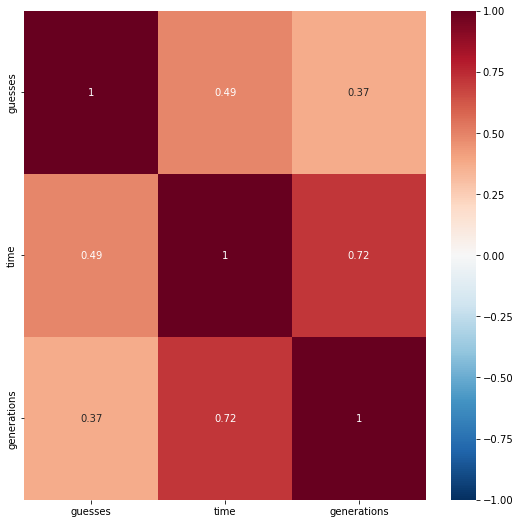

In [209]:
plt.figure(figsize=(9,9))
sns.heatmap(corrmat, cmap="RdBu_r", vmin=-1, vmax=1, annot=True)

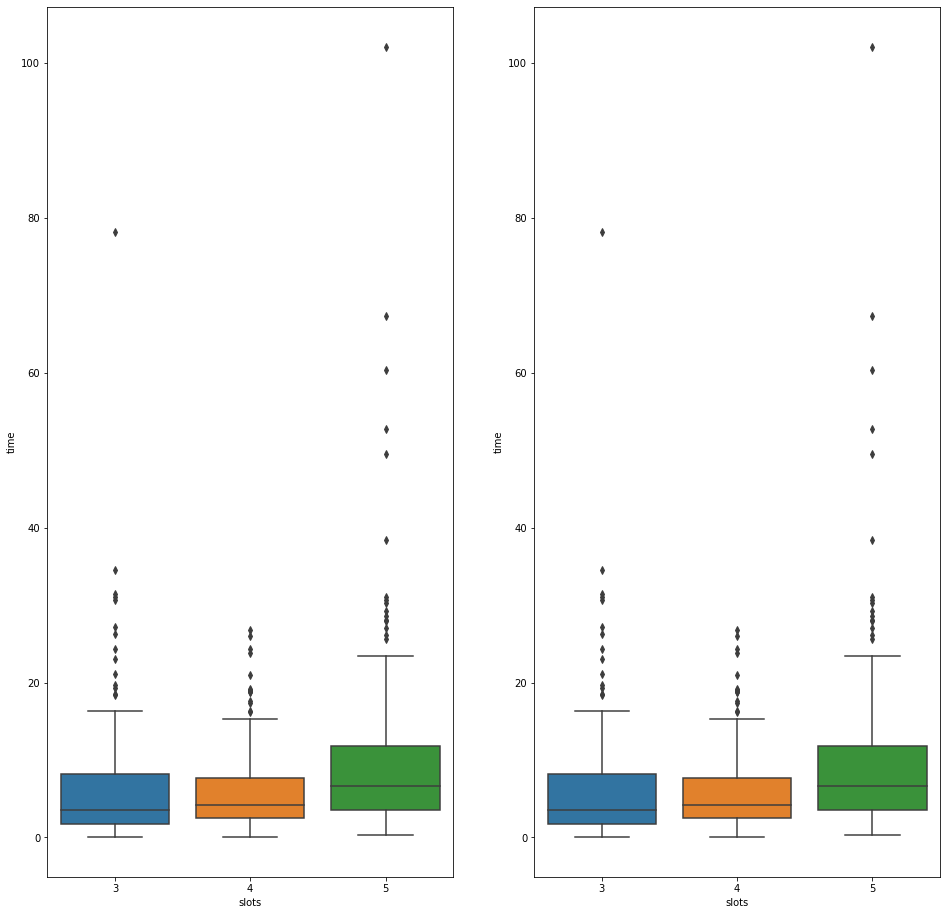

In [215]:
import seaborn as sns
fig, axes = plt.subplots(1, 2, figsize=(16, 16))
for i, y in enumerate([df.time, df.time]):
    sns.boxplot(x=df.slots, y=y, ax=axes[i])

In [224]:
[0:240]

,guesses,time
slots,,
3,6.0,0.886235
3,4.0,0.337180
3,4.0,0.040958
3,3.0,0.266367
3,6.0,0.810668
...,...,...
3,5.0,6.235363
3,3.0,0.277563
3,8.0,31.395140


In [225]:
df.set_index("slots")[["guesses", "time"]].loc[3]

,guesses,time
slots,,
3,6.0,0.886235
3,4.0,0.337180
3,4.0,0.040958
3,3.0,0.266367
3,6.0,0.810668
...,...,...
3,5.0,6.235363
3,3.0,0.277563
3,8.0,31.395140


Text(0.5, 0.98, '$n_{guesses}$ Data Distribution Plots')

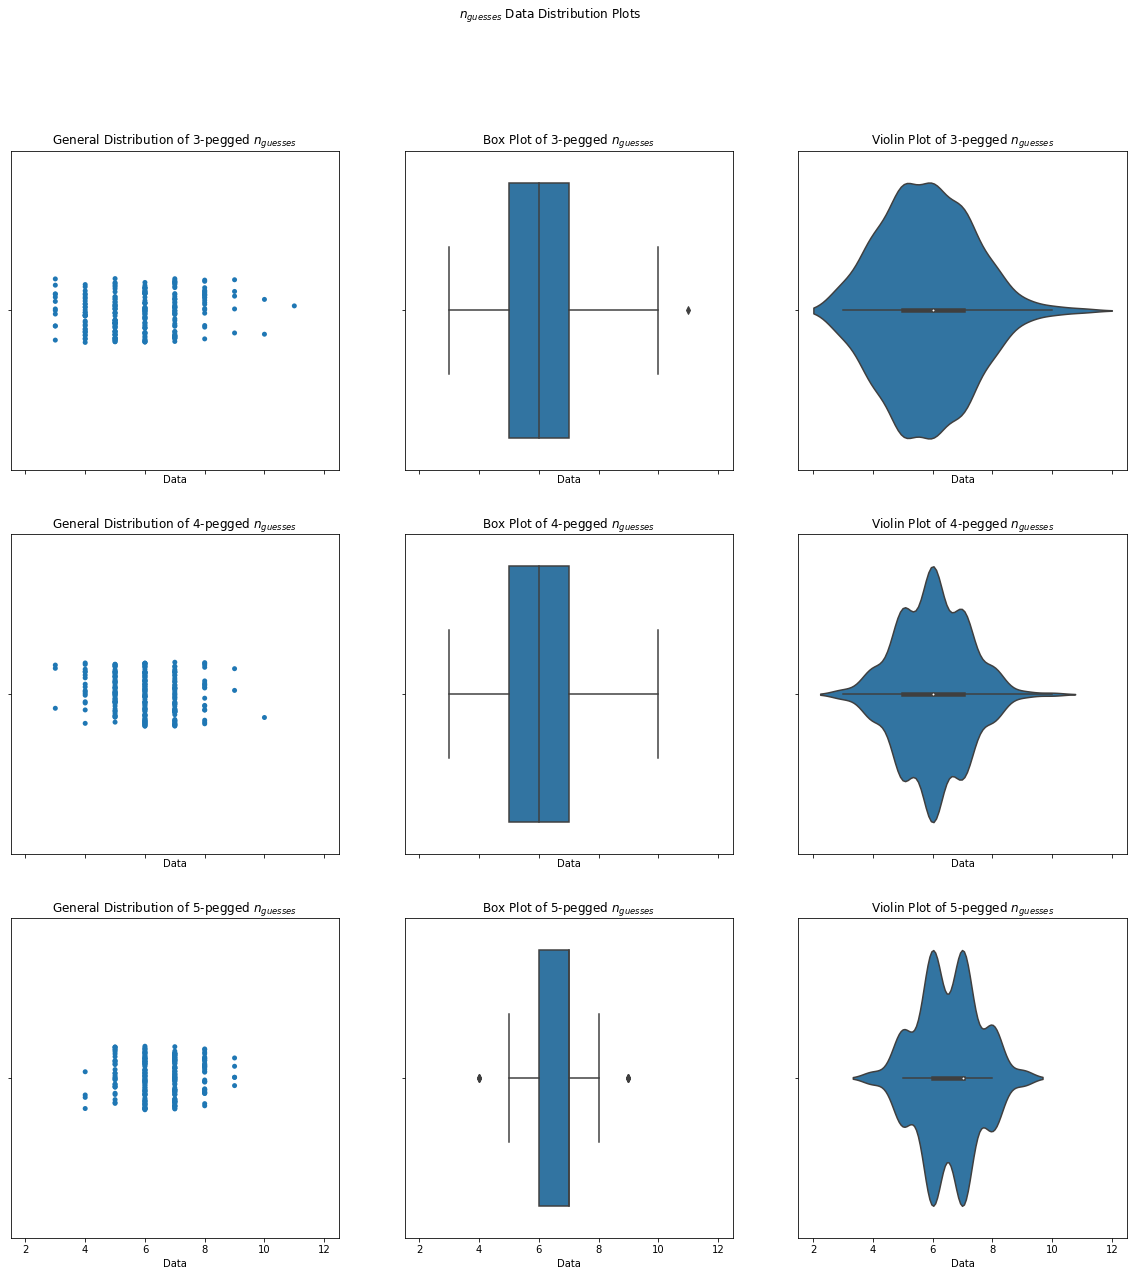

In [237]:
bySlot = df.set_index("slots")[["guesses", "time"]]
fig, axes = plt.subplots(3, 3,figsize=(20, 20), sharex=True)
for i in range(3):
    slots = i+3
    data = bySlot.loc[slots].guesses
    functions = [sns.stripplot, sns.boxplot, sns.violinplot]
    names = ["General Distribution", "Box Plot", "Violin Plot"]
    for j,func,name in zip(range(3), functions, names):
        ax = axes[i, j]
        func(x=data, ax=ax)
        ax.set(xlabel="Data", title=name+" of "+str(slots)+"-pegged $n_{guesses}$")
    
fig.suptitle("$n_{guesses}$ Data Distribution Plots")

Text(0.5, 0.98, '$t_{elapsed}$ Data Distribution Plots')

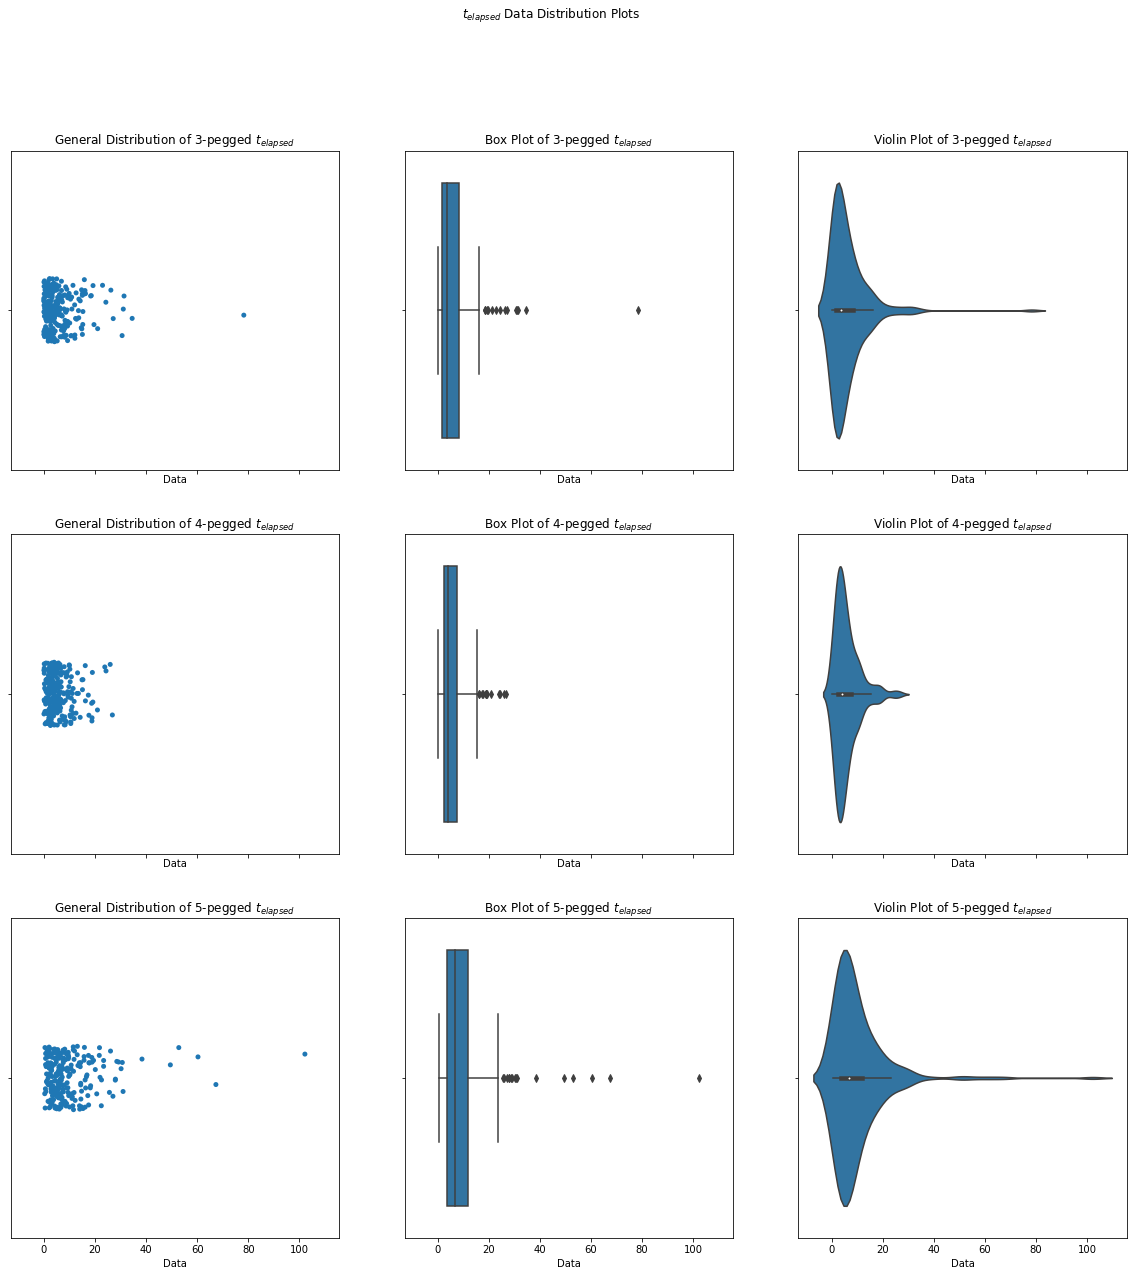

In [238]:
bySlot = df.set_index("slots")[["guesses", "time"]]
fig, axes = plt.subplots(3, 3,figsize=(20, 20), sharex=True)
for i in range(3):
    slots = i+3
    data = bySlot.loc[slots].time
    functions = [sns.stripplot, sns.boxplot, sns.violinplot]
    names = ["General Distribution", "Box Plot", "Violin Plot"]
    for j,func,name in zip(range(3), functions, names):
        ax = axes[i, j]
        func(x=data, ax=ax)
        ax.set(xlabel="Data", title=name+" of "+str(slots)+"-pegged $t_{elapsed}$")
    
fig.suptitle("$t_{elapsed}$ Data Distribution Plots")

Text(0.5, 0.98, '$n_{guesses}$ Data Distribution Plots')

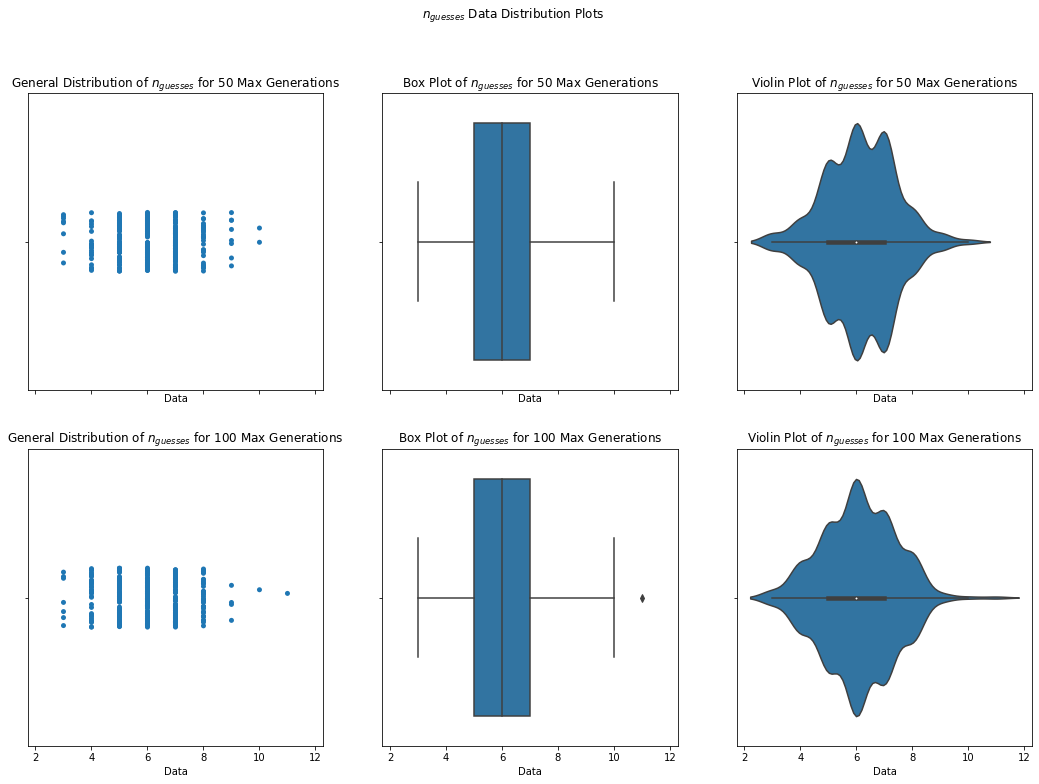

In [249]:
byMaxGen = df.set_index("maxgen")[["guesses", "time"]]
fig, axes = plt.subplots(2, 3,figsize=(18,12), sharex=True)
for i in range(2):
    maxgen = (i+1)*50
    data = byMaxGen.loc[maxgen].guesses
    functions = [sns.stripplot, sns.boxplot, sns.violinplot]
    names = ["General Distribution", "Box Plot", "Violin Plot"]
    for j,func,name in zip(range(3), functions, names):
        ax = axes[i, j]
        func(x=data, ax=ax)
        ax.set(xlabel="Data", title=name+" of $n_{guesses}$ for "+str(maxgen)+" Max Generations")
    
fig.suptitle("$n_{guesses}$ Data Distribution Plots")

Text(0.5, 0.98, '$t_{elapsed}$ Data Distribution Plots')

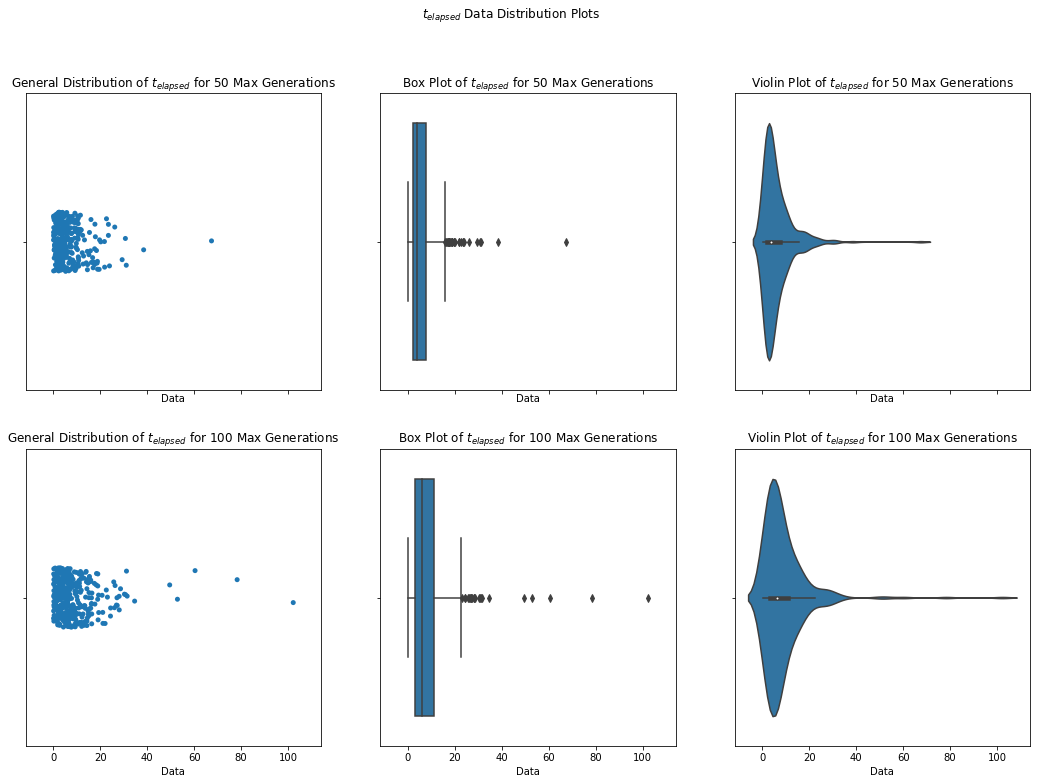

In [248]:
byMaxGen = df.set_index("maxgen")[["guesses", "time"]]
fig, axes = plt.subplots(2, 3,figsize=(18, 12), sharex=True)
for i in range(2):
    maxgen = (i+1)*50
    data = byMaxGen.loc[maxgen].time
    functions = [sns.stripplot, sns.boxplot, sns.violinplot]
    names = ["General Distribution", "Box Plot", "Violin Plot"]
    for j,func,name in zip(range(3), functions, names):
        ax = axes[i, j]
        func(x=data, ax=ax)
        ax.set(xlabel="Data", title=name+" of $t_{elapsed}$ for "+str(maxgen)+" Max Generations")
    
fig.suptitle("$t_{elapsed}$ Data Distribution Plots")